<a href="https://colab.research.google.com/github/aishaabduallah/week4/blob/main/ANN_Model_Exercise_Iris_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an ANN with the Iris Dataset
    
    ## Introduction
    Artificial Neural Networks (ANNs) are a cornerstone of modern machine learning. In this lab, you will construct a simple ANN to classify iris plants into one of three species based on the length and width of their sepals and petals. This exercise will help you understand the basics of neural networks, including their architecture, activation functions, and the backpropagation algorithm for training.

    ## Dataset Reference
    The Iris dataset was introduced by the British statistician and biologist Ronald Fisher in 1936. It is widely used as a beginner's dataset for machine learning classification problems. You can access this dataset via the `sklearn.datasets` module.
    

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


## Part 1: Load and Explore the Data

    

In [2]:
iris = load_iris()
df= pd.DataFrame(iris.data, columns=iris.feature_names )

df['target'] = iris.target


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Part 2: Prepare the Data
    ### Split the Data into Training and Test Sets
    **Hint**: Use `train_test_split` from `sklearn.model_selection` to divide the data into training and test sets.

    ### Scale the Features
    **Hint**: Standardize the features using `StandardScaler` from `sklearn.preprocessing`.
    

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1) # drop labels for training set
y = df["target"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [7]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Part 3: Build the ANN Model


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(8 , input_dim=X_train.shape[1], activation= 'relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

optimizer= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,035 (11.86 KB)

 Trainable params: 3,035 (11.86 KB)

 Non-trainable params: 0 (0.00 B)

## Part 4: Train the Model


In [14]:
history= model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test) , verbose=1)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9503 - loss: 0.2599 - val_accuracy: 0.9000 - val_loss: 0.2638
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9697 - loss: 0.2163 - val_accuracy: 0.9000 - val_loss: 0.2428
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9525 - loss: 0.1935 - val_accuracy: 0.9667 - val_loss: 0.1985
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9661 - loss: 0.1626 - val_accuracy: 0.9667 - val_loss: 0.1617
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9733 - loss: 0.1480 - val_accuracy: 0.9000 - val_loss: 0.1880
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9542 - loss: 0.1552 - val_accuracy: 0.9667 - val_loss: 0.1251
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9638 - loss: 0.1107 - val_accuracy: 0.9667 - val_loss: 0.1265
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9718 - loss: 0.1057 - val_accuracy: 0.9667 - val

### Part 4: Model Evaluation

In [12]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9000 - loss: 0.3228


[0.3227608799934387, 0.8999999761581421]

In [13]:
model.evaluate(X_train, y_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9444 - loss: 0.2581 


[0.2805093824863434, 0.9416666626930237]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
F1 Score: 0.97
Recall Score: 0.97


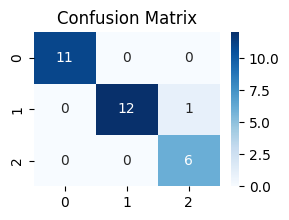

In [15]:
y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")
print(f"Recall Score: {recall:.2f}")

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

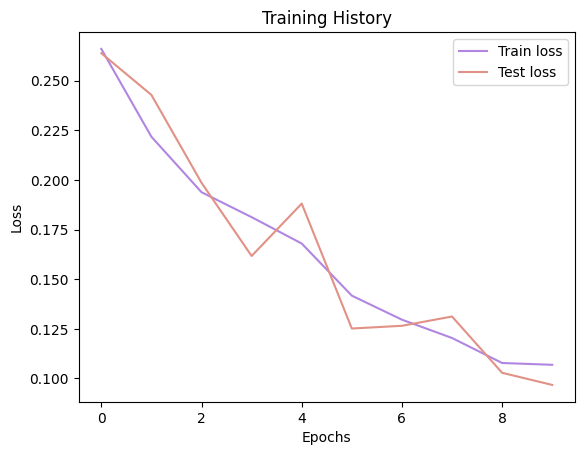

In [16]:
plt.plot(history.history['loss'], color='#b186e1', label='Train loss')
plt.plot(history.history['val_loss'], color='#e19186', label='Test loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part 5: Experiment and Improve

    

In [17]:
model2 = Sequential()

model2.add(Dense(8 , input_dim=X_train.shape[1], activation= 'tanh'))
model2.add(Dense(16, activation='tanh'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(3, activation='softmax'))

optimizer= Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-8) #change learning rate
model2.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,955 (175.61 KB)

 Trainable params: 44,955 (175.61 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
hisroty= model2.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_test, y_test) , verbose=1)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5813 - loss: 0.8988 - val_accuracy: 0.6667 - val_loss: 0.5983
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8830 - loss: 0.2871 - val_accuracy: 0.8333 - val_loss: 0.2990
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9605 - loss: 0.1642 - val_accuracy: 0.8333 - val_loss: 0.2019
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8852 - loss: 0.3745 - val_accuracy: 0.8333 - val_loss: 0.3720
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9477 - loss: 0.1373 - val_accuracy: 0.9667 - val_loss: 0.1134
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9583 - loss: 0.1020 - val_accuracy: 0.8667 - val_loss: 0.2570
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9867 - loss: 0.0872 - val_accuracy: 0.9667 - val_loss: 0.0664
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9879 - loss: 0.0651 - val_accuracy: 0.9333 - val_los

### Part 4: Model Evaluation

In [20]:
model2.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9667 - loss: 0.0662


[0.06617862731218338, 0.9666666388511658]

In [21]:
model2.evaluate(X_train, y_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9915 - loss: 0.0387 


[0.041692353785037994, 0.9916666746139526]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
F1 Score: 0.97
Recall Score: 0.97


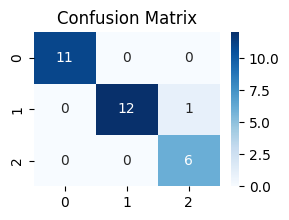

In [22]:
y_pred = model2.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")
print(f"Recall Score: {recall:.2f}")

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

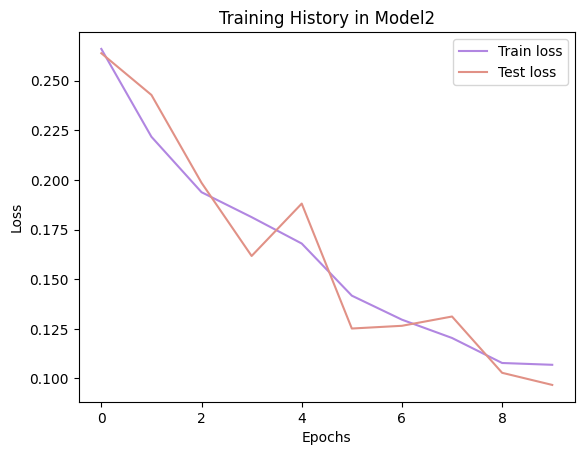

In [23]:
plt.plot(history.history['loss'], color='#b186e1', label='Train loss')
plt.plot(history.history['val_loss'], color='#e19186', label='Test loss')
plt.title('Training History in Model2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()